In [1]:
import os
import math

import skimage.feature
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Number of Points: 2813


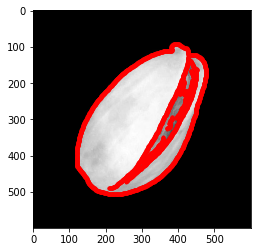

In [2]:
rgb_im = plt.imread("Siirt_Pistachio/siirt (1).jpg")
im = rgb2gray(rgb_im)
edgeIm = skimage.feature.canny(im, sigma=3)
cord = np.argwhere(edgeIm)

## convert the indexes to x-y cordinates
# TODO noOfPoints = ??
noOfPoints = cord.shape[0]

# get X and Y through vectorized index access instead of for loop
X = cord[:, 1]
Y = cord[:, 0]

# Print the number of points
print(f'Number of Points: {noOfPoints}')

# display the image and plot the edge coordinates
## display the image 
plt.imshow(im, cmap="gray") 
plt.plot(X, Y, 'r.')
plt.show()

In [10]:
# read input
img = cv2.imread("Siirt_Pistachio/siirt (1).jpg")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 100 , 255, cv2.THRESH_BINARY)[1]

# find largest contour
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
ellipse = cv2.fitEllipse(big_contour)
(xc,yc),(d1,d2),angle = ellipse
# print(xc,yc,d1,d1,angle)

# draw ellipse
result = img.copy()
cv2.ellipse(result, ellipse, (0, 255, 0), 3)

# draw circle at center
xc, yc = ellipse[0]
cv2.circle(result, (int(xc),int(yc)), 10, (255, 0, 0), 20)

# draw vertical line
# compute major radius
rmajor = max(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
# print(angle)
xtop_major = xc + math.cos(math.radians(angle))*rmajor
ytop_major = yc + math.sin(math.radians(angle))*rmajor
xbot_major = xc + math.cos(math.radians(angle+180))*rmajor
ybot_major = yc + math.sin(math.radians(angle+180))*rmajor
cv2.line(result, (int(xtop_major),int(ytop_major)), (int(xbot_major),int(ybot_major)), (0, 0, 255), 3)

# draw vertical line
# compute minor radius
rminor = min(d1,d2)/2
if angle > 90:
    angle = angle - 90
else:
    angle = angle + 90
# print(angle)
xtop_minor = xc + math.cos(math.radians(angle))*rminor
ytop_minor = yc + math.sin(math.radians(angle))*rminor
xbot_minor = xc + math.cos(math.radians(angle+180))*rminor
ybot_minor = yc + math.sin(math.radians(angle+180))*rminor
cv2.line(result, (int(xtop_minor),int(ytop_minor)), (int(xbot_minor),int(ybot_minor)), (0, 0, 255), 3)

cv2.imwrite("test_ellipse.jpg", result)


289.093505859375 297.68115234375 264.4208068847656 264.4208068847656 126.02337646484375
36.02337646484375
126.02337646484375


True

In [32]:
def process_ellipse(fname):
    # read input
    img = cv2.imread(fname)

    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold
    thresh = cv2.threshold(gray, 100 , 255, cv2.THRESH_BINARY)[1]

    # find largest contour
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # fit contour to ellipse and get ellipse center, minor and major diameters and angle in degree 
    ellipse = cv2.fitEllipse(big_contour)
    (xc,yc),(d1,d2),angle = ellipse
#     print(xc,yc,d1,d1,angle)

    # draw ellipse
    result = img.copy()
    cv2.ellipse(result, ellipse, (0, 255, 0), 3)

    # draw circle at center
    xc, yc = ellipse[0]
    cv2.circle(result, (int(xc),int(yc)), 10, (255, 0, 0), 20)

    # draw vertical line
    # compute major radius
    rmajor = max(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
#     print(angle)
    xtop_major = xc + math.cos(math.radians(angle))*rmajor
    ytop_major = yc + math.sin(math.radians(angle))*rmajor
    xbot_major = xc + math.cos(math.radians(angle+180))*rmajor
    ybot_major = yc + math.sin(math.radians(angle+180))*rmajor
    cv2.line(result, (int(xtop_major),int(ytop_major)), (int(xbot_major),int(ybot_major)), (0, 0, 255), 3)
    major_distance = ((xtop_major - xbot_major)**2 + (ytop_major - ybot_major)**2)**0.5

    # draw vertical line
    # compute minor radius
    rminor = min(d1,d2)/2
    if angle > 90:
        angle = angle - 90
    else:
        angle = angle + 90
#     print(angle)
    xtop_minor = xc + math.cos(math.radians(angle))*rminor
    ytop_minor = yc + math.sin(math.radians(angle))*rminor
    xbot_minor = xc + math.cos(math.radians(angle+180))*rminor
    ybot_minor = yc + math.sin(math.radians(angle+180))*rminor
    cv2.line(result, (int(xtop_minor),int(ytop_minor)), (int(xbot_minor),int(ybot_minor)), (0, 0, 255), 3)
    minor_distance = ((xtop_minor - xbot_minor)**2 + (ytop_minor - ybot_minor)**2)**0.5
#     cv2.imwrite("test_ellipse.jpg", result)
    
    major_radius = major_distance/2
    minor_radius = minor_distance/2
    ellipse_area = np.pi * major_radius * minor_radius
    ellipse_perimeter = 2 * np.pi * ((major_radius ** 2 + minor_radius ** 2)/2) ** 0.5
#     input(fname.replace("/", "_processed/"))
    cv2.imwrite(fname.replace("/", "_processed/"), result)
#     print(area, perimeter)
    
    cnt = contours[0]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
#     print(area, perimeter)
    
    return major_distance, minor_distance, area, perimeter, ellipse_area, ellipse_perimeter

In [33]:
process_ellipse("Siirt_Pistachio/siirt (1).jpg")

(465.1001281738281,
 264.4208068847656,
 95987.5,
 1302.9818782806396,
 96589.95566267318,
 1188.495045122222)

In [34]:
df = pd.read_csv("pistachios.csv", index_col=0)
df.head()

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78712.655547
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,90553.003463
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82912.816940
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,84512.626684
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73832.194933


In [36]:
major_axes = []
minor_axes = []
areas = []
perimeters = []
ellipse_areas = []
ellipse_perimeters = []
for fname in df.filename.values:
    if "kirm" in fname:
        fname = "Kirmizi_Pistachio/{}".format(fname)
    else:
        fname = "Siirt_Pistachio/{}".format(fname)
    majax, minax, area, perimeter, ellipse_area, ellipse_perimeter = process_ellipse(fname)
    major_axes.append(majax)
    minor_axes.append(minax)
    areas.append(area)
    perimeters.append(perimeter)
    ellipse_areas.append(ellipse_area)
    ellipse_perimeters.append(ellipse_perimeter)

In [37]:
df["major_axis"] = major_axes
df["minor_axis"] = minor_axes
df["area"] = areas
df["perimeter"] = perimeters
df["ellipse_area"] = ellipse_areas
df["ellipse_perimeter"] = ellipse_perimeters
df.head()

,filename,filename_camelcase,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter
0,kirmizi (23).jpg,kirmizi_23.jpg,0,453.495544,220.994598,78732.0,1216.631593,78712.655547,1120.665639
1,kirmizi 21.jpg,kirmizi_21.jpg,0,464.291748,248.325897,89545.0,1268.371705,90553.003463,1169.652914
2,kirmizi 35.jpg,kirmizi_35.jpg,0,481.507446,219.244537,82487.0,1223.376759,82912.816940,1175.303335
3,kirmizi 475.jpg,kirmizi_475.jpg,0,455.230591,236.374313,83621.5,1189.217379,84512.626684,1139.466757
4,kirmizi 313.jpg,kirmizi_313.jpg,0,416.695648,225.598877,73160.5,1095.702659,73832.194933,1052.621353


In [38]:
df.to_csv("pistachios.csv")

In [39]:
k = df.loc[df["pistachio_type"] == 0]
k.describe()

,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter
count,1232.0,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.0,448.890361,228.492276,78335.988231,1199.141277,80720.754508,1119.697326
std,0.0,33.258607,18.970846,13376.663336,174.846633,10162.928443,74.337294
min,0.0,290.226349,144.525345,0.000000,0.000000,32943.575566,720.236783
25%,0.0,427.156517,216.749313,73223.250000,1147.560526,74397.619964,1072.199883
50%,0.0,451.003815,228.437592,79244.250000,1204.187941,80695.299514,1123.027813
75%,0.0,472.193787,240.561920,86068.125000,1267.585651,87457.046638,1171.643273
max,0.0,545.663330,294.925720,107577.000000,2288.410372,110661.140448,1320.334508


In [40]:
s = df.loc[df["pistachio_type"] == 1]
s.describe()

,pistachio_type,major_axis,minor_axis,area,perimeter,ellipse_area,ellipse_perimeter
count,916.0,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,1.0,453.178084,261.629843,92180.407205,1289.736385,93163.157328,1163.355106
std,0.0,26.722778,20.132223,10280.505978,119.506756,9423.676652,58.111032
min,1.0,350.385193,211.362762,1.000000,11.656854,67529.569679,971.776853
25%,1.0,436.700401,246.716869,85947.125000,1223.051901,86640.674258,1124.925421
50%,1.0,454.200592,260.165527,92180.500000,1276.220948,92933.084541,1165.084379
75%,1.0,471.185173,273.979897,98585.875000,1340.709800,99406.322785,1202.405163
max,1.0,539.891357,339.853668,129225.000000,2297.214414,129757.701957,1378.592544


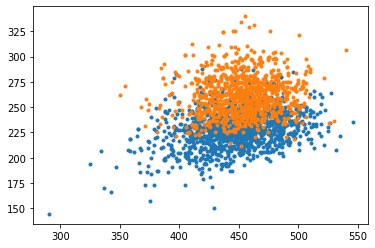

In [43]:
plt.plot(k.major_axis, k.minor_axis, ".")
plt.plot(s.major_axis, s.minor_axis, ".")

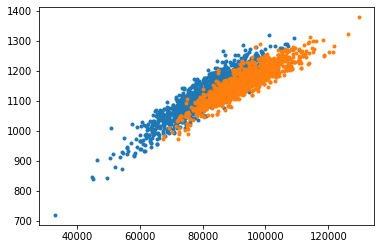

In [47]:
plt.plot(k.ellipse_area, k.ellipse_perimeter, ".")
plt.plot(s.ellipse_area, s.ellipse_perimeter, ".")

In [2]:
import pandas as pd
check = pd.read_excel("../Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx")
check.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

model = LogisticRegression()
X = check[check.columns[:-1]]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = check["Class"]

In [13]:
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances["Importance"] = pd.np.abs(importances["Importance"])
importances = importances.sort_values(by='Importance', ascending=False)
importances

/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aura_dev/.virtualenvs/w281/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Attribute,Importance
19,StdDev_RR,5.560778
16,Mean_RR,3.730967
9,Aspect_Ratio,3.662814
26,Kurtosis_RG,3.245012
25,Kurtosis_RR,2.963614
14,Shapefactor_3,2.922480
4,Eccentricity,2.714083
0,Area,2.661083
27,Kurtosis_RB,2.643941
11,Compactness,2.628424
